In [3]:
from segment_anything import SamPredictor, sam_model_registry
import cv2
import numpy as np

points = [(250, 200), (250, 400), (250, 600)]

image = cv2.imread("images/image_cubes.png")
sam = sam_model_registry["vit_h"](checkpoint="models\sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
predictor.set_image(image)

masks = []
for point in points:
    input_point = np.array([point])
    input_label = np.array([1])  # 1 = "foreground"
    masks_, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=False,
    )
    masks.append(masks_[0])  # Ajout du masque de l'objet


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bapti\AppData\Local\Temp\ipykernel_62212\978360351.py:8: SyntaxWarning: invalid escape sequence '\s'
  sam = sam_model_registry["vit_h"](checkpoint="models\sam_vit_h_4b8939.pth")


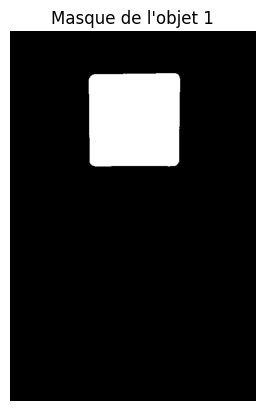

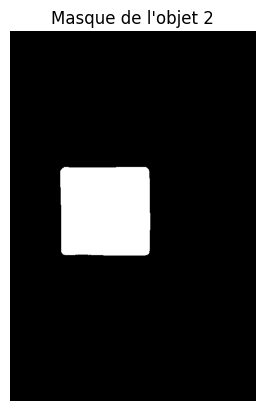

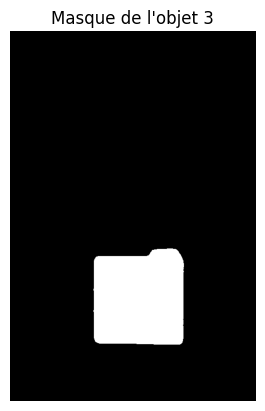

In [5]:
import matplotlib.pyplot as plt

for i, mask in enumerate(masks):
    plt.figure()
    plt.title(f"Masque de l'objet {i+1}")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")

plt.show()